In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline


from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score

In [2]:
#Importing the training and test dataset
df_train = pd.read_csv('Training.csv', sep=';')
df_test = pd.read_csv('Validation.csv', sep=';')

In [3]:
df_train.head()

,v33,v76,v12,v68,v50,v7,v70,v55,v20,v24,...,v28,v99,v95,v42,v53,v85,v9,v84,v44,classlabel
0,v,g,"17,92",f,"1,75",a,t,80.0,"0,000054",1,...,t,c,t,800000.0,5,g,0,f,f,no.
1,v,s,"16,92",f,"0,29",b,f,200.0,"0,0000335",0,...,f,k,NaN,2000000.0,0,p,1,f,f,no.
2,ff,g,"31,25",f,0,b,t,96.0,"0,0001125",1,...,f,ff,t,960000.0,19,g,0,f,f,no.
3,o,g,"48,17",f,"0,335",a,f,0.0,"0,0001335",0,...,f,i,NaN,0.0,120,g,1,f,f,no.
4,v,g,"32,33",t,"0,5",b,f,232.0,"0,00035",0,...,t,k,f,2320000.0,0,g,1,f,f,no.


In [4]:
df_train.dtypes

v33            object
v76            object
v12            object
v68            object
v50            object
v7             object
v70            object
v55           float64
v20            object
v24             int64
v32            object
v97            object
v28            object
v99            object
v95            object
v42           float64
v53             int64
v85            object
v9              int64
v84            object
v44            object
classlabel     object
dtype: object

In [5]:
df_train.shape

(3700, 22)

In [6]:
columns = df_train.columns
for column in columns:
    try:
        f_val = float(str(df_train[column][0]).replace(',','.'))
        if type(f_val) is float:
            df_train[column] = df_train[column].apply(lambda x: float(str(x).replace(',','.')))
            df_test[column] = df_test[column].apply(lambda x: float(str(x).replace(',','.')))
    except Exception as e:
        pass

In [7]:
df_train.head()

,v33,v76,v12,v68,v50,v7,v70,v55,v20,v24,...,v28,v99,v95,v42,v53,v85,v9,v84,v44,classlabel
0,v,g,17.92,f,1.750,a,t,80.0,0.000054,1.0,...,t,c,t,800000.0,5.0,g,0.0,f,f,no.
1,v,s,16.92,f,0.290,b,f,200.0,0.000034,0.0,...,f,k,NaN,2000000.0,0.0,p,1.0,f,f,no.
2,ff,g,31.25,f,0.000,b,t,96.0,0.000112,1.0,...,f,ff,t,960000.0,19.0,g,0.0,f,f,no.
3,o,g,48.17,f,0.335,a,f,0.0,0.000133,0.0,...,f,i,NaN,0.0,120.0,g,1.0,f,f,no.
4,v,g,32.33,t,0.500,b,f,232.0,0.000350,0.0,...,t,k,f,2320000.0,0.0,g,1.0,f,f,no.


In [8]:
df_train.dtypes

v33            object
v76            object
v12           float64
v68            object
v50           float64
v7             object
v70            object
v55           float64
v20           float64
v24           float64
v32            object
v97           float64
v28            object
v99            object
v95            object
v42           float64
v53           float64
v85            object
v9            float64
v84            object
v44            object
classlabel     object
dtype: object

In [9]:
df_train.describe()

,v12,v50,v55,v20,v24,v97,v42,v53,v9
count,3661.000000,3700.000000,3600.000000,3700.000000,3700.000000,3700.000000,3.600000e+03,3700.000000,3700.000000
mean,32.820713,3.439496,162.695000,0.000585,4.160000,3.321473,1.626950e+06,2246.705946,0.495676
std,12.666181,4.335229,156.045682,0.000540,6.750553,1.009448,1.560457e+06,8708.571126,0.500049
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,23.000000,0.500000,0.000000,0.000150,0.000000,2.630000,0.000000e+00,0.000000,0.000000
50%,28.670000,1.750000,120.000000,0.000425,2.000000,3.320000,1.200000e+06,113.000000,0.000000
75%,40.830000,5.000000,280.000000,0.000963,6.000000,4.000000,2.800000e+06,1059.750000,1.000000
max,80.250000,28.500000,1160.000000,0.002800,67.000000,6.620000,1.160000e+07,100000.000000,1.000000


In [10]:
categorical = df_train.dtypes[df_train.dtypes == "object"].index

In [11]:
df_train[categorical].describe()

,v33,v76,v68,v7,v70,v32,v28,v99,v95,v85,v84,v44,classlabel
count,3634,3700,3700,3661,3700,3636,3700,3634,1555,3636,3700,3700,3700
unique,9,3,2,2,2,3,2,14,2,3,2,2,2
top,v,g,t,b,t,u,f,c,t,g,f,f,yes.
freq,2015,3430,3423,2382,2239,3055,1924,787,1023,3055,2096,2133,3424


In [12]:
train_missing = {}
test_missing = {}
for c in categorical:
    train_m = np.where(df_train[c].isnull() == True)
    test_m = np.where(df_test[c].isnull() == True)
    if len(train_m[0]) > 0:
        train_missing[c] = {'length':len(train_m[0])}
    if len(test_m[0]) > 0:
        test_missing[c] = {'length':len(test_m[0])}

print(pd.DataFrame(train_missing.items()).head())
print(pd.DataFrame(test_missing.items()).head())

     0                 1
0  v33    {'length': 66}
1  v85    {'length': 64}
2   v7    {'length': 39}
3  v99    {'length': 66}
4  v95  {'length': 2145}
     0                1
0  v33    {'length': 3}
1  v85    {'length': 2}
2   v7    {'length': 3}
3  v99    {'length': 3}
4  v95  {'length': 111}


In [13]:
del df_train['v95']
del df_test['v95']

In [14]:
categorical = df_train.dtypes[df_train.dtypes == "object"].index

In [15]:
train_missing = {}
test_missing = {}
for c in categorical:
    train_m = np.where(df_train[c].isnull() == True)
    test_m = np.where(df_test[c].isnull() == True)
    if len(train_m[0]) > 0:
        train_missing[c] = {'length':len(train_m[0])}
    if len(test_m[0]) > 0:
        test_missing[c] = {'length':len(test_m[0])}
print(train_missing.keys())
print(test_missing.keys())

dict_keys(['v33', 'v85', 'v99', 'v7', 'v32'])
dict_keys(['v33', 'v85', 'v99', 'v7', 'v32'])


In [16]:
df_train['v85'].value_counts()

g     3055
p      549
gg      32
Name: v85, dtype: int64

In [17]:
df_train['v99'].value_counts()

c     787
q     612
W     363
cc    343
x     340
aa    210
i     191
m     179
k     170
e     137
ff    136
d      94
j      39
r      33
Name: v99, dtype: int64

In [18]:
mappings_train = {}
mappings_test = {}
for key in train_missing.keys():
    mappings_train[key] = df_train[key].value_counts()._index[0]
    mappings_test[key] = df_test[key].value_counts()._index[0]
print(mappings_train)
print(mappings_test)

{'v33': 'v', 'v85': 'g', 'v99': 'c', 'v7': 'b', 'v32': 'u'}
{'v33': 'v', 'v85': 'g', 'v99': 'c', 'v7': 'b', 'v32': 'u'}


In [19]:
for k in mappings_train:
    df_train[k].fillna(mappings_train[k], inplace=True)
    df_test[k].fillna(mappings_train[k], inplace=True)

categorical = df_train.dtypes[df_train.dtypes == "object"].index
num_missing = {}
for c in categorical:
    missing = np.where(df_train[c].isnull() == True)
    if len(missing[0]) > 0:
        num_missing[c] = {'length':len(missing[0]), "missing":missing}
num_missing.keys()

dict_keys([])

In [20]:
train_any_nan_cols = df_train.columns[df_train.isnull().any()]
test_any_nan_cols = df_test.columns[df_test.isnull().any()]
print(train_any_nan_cols)
print(test_any_nan_cols)

Index(['v12', 'v55', 'v42'], dtype='object')
Index(['v12', 'v55', 'v42'], dtype='object')


In [21]:
for c in train_any_nan_cols:
    df_train[c].fillna(df_train[c].mean(), inplace=True)
    df_test[c].fillna(df_test[c].mean(), inplace=True)

In [22]:
train_any_nan_cols = df_train.columns[df_train.isnull().any()]
test_any_nan_cols = df_test.columns[df_test.isnull().any()]
print(train_any_nan_cols)
print(test_any_nan_cols)

Index([], dtype='object')
Index([], dtype='object')


In [23]:
df_train.head()

,v33,v76,v12,v68,v50,v7,v70,v55,v20,v24,...,v97,v28,v99,v42,v53,v85,v9,v84,v44,classlabel
0,v,g,17.92,f,1.750,a,t,80.0,0.000054,1.0,...,2.82,t,c,800000.0,5.0,g,0.0,f,f,no.
1,v,s,16.92,f,0.290,b,f,200.0,0.000034,0.0,...,3.45,f,k,2000000.0,0.0,p,1.0,f,f,no.
2,ff,g,31.25,f,0.000,b,t,96.0,0.000112,1.0,...,3.24,f,ff,960000.0,19.0,g,0.0,f,f,no.
3,o,g,48.17,f,0.335,a,f,0.0,0.000133,0.0,...,4.21,f,i,0.0,120.0,g,1.0,f,f,no.
4,v,g,32.33,t,0.500,b,f,232.0,0.000350,0.0,...,3.44,t,k,2320000.0,0.0,g,1.0,f,f,no.


In [24]:
categorical = df_train.dtypes[df_train.dtypes == "object"].index
categorical

Index(['v33', 'v76', 'v68', 'v7', 'v70', 'v32', 'v28', 'v99', 'v85', 'v84',
       'v44', 'classlabel'],
      dtype='object')

In [25]:
df_train_cpy = df_train.copy()
df_test_cpy = df_test.copy()
for c in categorical:
    df_train_cpy[c] = df_train_cpy[c].astype('category')
    df_test_cpy[c] = df_test_cpy[c].astype('category')
    df_train_cpy[c] = df_train_cpy[c].cat.codes
    df_test_cpy[c] = df_test_cpy[c].cat.codes
df_train_cpy.head()

,v33,v76,v12,v68,v50,v7,v70,v55,v20,v24,...,v97,v28,v99,v42,v53,v85,v9,v84,v44,classlabel
0,7,0,17.92,0,1.750,0,1,80.0,0.000054,1.0,...,2.82,1,2,800000.0,5.0,0,0.0,0,0,0
1,7,2,16.92,0,0.290,1,0,200.0,0.000034,0.0,...,3.45,0,9,2000000.0,0.0,2,1.0,0,0,0
2,2,0,31.25,0,0.000,1,1,96.0,0.000112,1.0,...,3.24,0,6,960000.0,19.0,0,0.0,0,0,0
3,6,0,48.17,0,0.335,0,0,0.0,0.000133,0.0,...,4.21,0,7,0.0,120.0,0,1.0,0,0,0
4,7,0,32.33,1,0.500,1,0,232.0,0.000350,0.0,...,3.44,1,9,2320000.0,0.0,0,1.0,0,0,0


In [26]:
df_test_cpy.head()

,v33,v76,v12,v68,v50,v7,v70,v55,v20,v24,...,v97,v28,v99,v42,v53,v85,v9,v84,v44,classlabel
0,0,2,32.33,1,1.585,1,0,420.0,0.000750,0.0,...,4.33,1,5,4200000.0,0.0,0,1.0,0,1,0
1,6,0,23.58,0,0.540,1,0,136.0,0.000179,0.0,...,4.37,1,2,1360000.0,1.0,0,0.0,0,0,0
2,6,0,36.42,1,0.585,1,0,240.0,0.000075,0.0,...,3.79,0,4,2400000.0,3.0,1,1.0,0,0,0
3,6,0,18.42,0,0.125,1,0,120.0,0.001042,0.0,...,3.61,0,1,1200000.0,375.0,1,0.0,1,0,0
4,6,0,24.50,1,0.040,1,0,120.0,0.001334,0.0,...,3.68,1,1,1200000.0,475.0,1,0.0,0,0,0


### Applying dataset to classification algorithms

In [27]:
X_train = df_train_cpy.drop("classlabel", axis=1)
Y_train = df_train_cpy["classlabel"]
X_test  = df_test_cpy.drop("classlabel", axis=1)
Y_test = df_test_cpy["classlabel"]
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((3700, 20), (3700,), (200, 20), (200,))

In [28]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(accuracy_score(Y_test,Y_pred) * 100, 2)
acc_log

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


46.5

In [29]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(accuracy_score(Y_test,Y_pred) * 100, 2)
acc_svc

/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


59.0

In [30]:
# K Nearest Neighbors

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(accuracy_score(Y_test,Y_pred) * 100, 2)
acc_knn

64.5

In [31]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(accuracy_score(Y_test,Y_pred) * 100, 2)
acc_gaussian

69.0

In [32]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(accuracy_score(Y_test,Y_pred) * 100, 2)
acc_perceptron

47.0

In [33]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(accuracy_score(Y_test,Y_pred) * 100, 2)
acc_linear_svc

/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


49.0

In [34]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(accuracy_score(Y_test,Y_pred) * 100, 2)
acc_sgd

47.0

In [35]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(accuracy_score(Y_test,Y_pred) * 100, 2)
acc_decision_tree

49.0

In [36]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(accuracy_score(Y_test,Y_pred) * 100, 2)
acc_random_forest

49.5

In [37]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Naive Bayes,69.0
1,KNN,64.5
0,Support Vector Machines,59.0
3,Random Forest,49.5
7,Linear SVC,49.0
8,Decision Tree,49.0
5,Perceptron,47.0
6,Stochastic Gradient Decent,47.0
2,Logistic Regression,46.5


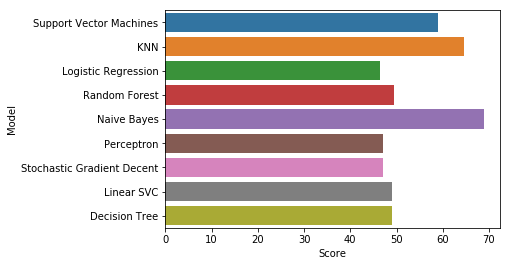

In [38]:
sns.barplot(x='Score', y='Model', data=models)
plt.show()

In [39]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)

pca = PCA(0.95)

pca.fit(X_train)

pca.n_components_

X_train = pca.transform(X_train)

X_train = pd.DataFrame(X_train)

In [40]:
scaler = StandardScaler()

scaler.fit(X_test)

X_test = scaler.transform(X_test)

pca = PCA(0.95)

pca.fit(X_test)

pca.n_components_

X_test = pca.transform(X_test)

X_test= pd.DataFrame(X_test)

In [41]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(accuracy_score(Y_test,Y_pred) * 100, 2)
acc_knn

48.5

In [42]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(accuracy_score(Y_test,Y_pred) * 100, 2)
acc_decision_tree

49.0

In [43]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(accuracy_score(Y_test,Y_pred) * 100, 2)
acc_random_forest

48.5

In [44]:
# creating odd list of K for KNN
neighbors = filter(lambda x: x % 2 != 0, list(range(1,50)))
# empty list that will hold cv scores
cv_scores = {}

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=10, scoring='accuracy')
    cv_scores[k] = scores.mean()

In [45]:
bess_k = max(cv_scores, key=lambda k: cv_scores[k])
bess_k

3

In [46]:
# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=bess_k)

# fitting the model
knn.fit(X_train, Y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
acc_knn = round(accuracy_score(Y_test,Y_pred) * 100, 2)
acc_knn

48.5

In [47]:
X_train = df_train_cpy.drop("classlabel", axis=1)
Y_train = df_train_cpy["classlabel"]
X_test  = df_test_cpy.drop("classlabel", axis=1)
Y_test = df_test_cpy["classlabel"]
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((3700, 20), (3700,), (200, 20), (200,))

In [48]:
clfs = []
clfs.append(LogisticRegression())
clfs.append(SVC())
clfs.append(KNeighborsClassifier(n_neighbors=3))
clfs.append(GaussianNB())
clfs.append(Perceptron())
clfs.append(LinearSVC())
clfs.append(SGDClassifier())
clfs.append(DecisionTreeClassifier())
clfs.append(RandomForestClassifier(n_estimators=100))

In [49]:
names=[]
scores=[]
for classifier in clfs:
    classifier.fit(X_train, Y_train)
    Y_pred = classifier.predict(X_test)
    acc = round(accuracy_score(Y_test,Y_pred) * 100, 2)
    name = str(classifier).split('(')[0]
    print('---------------------------------')
    print(name, acc)
    names.append(name)
    scores.append(acc)

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


---------------------------------
LogisticRegression 46.5
---------------------------------
SVC 59.0
---------------------------------
KNeighborsClassifier 64.5
---------------------------------
GaussianNB 69.0
---------------------------------
Perceptron 47.0


/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


---------------------------------
LinearSVC 45.5
---------------------------------
SGDClassifier 46.5
---------------------------------
DecisionTreeClassifier 51.0
---------------------------------
RandomForestClassifier 51.0


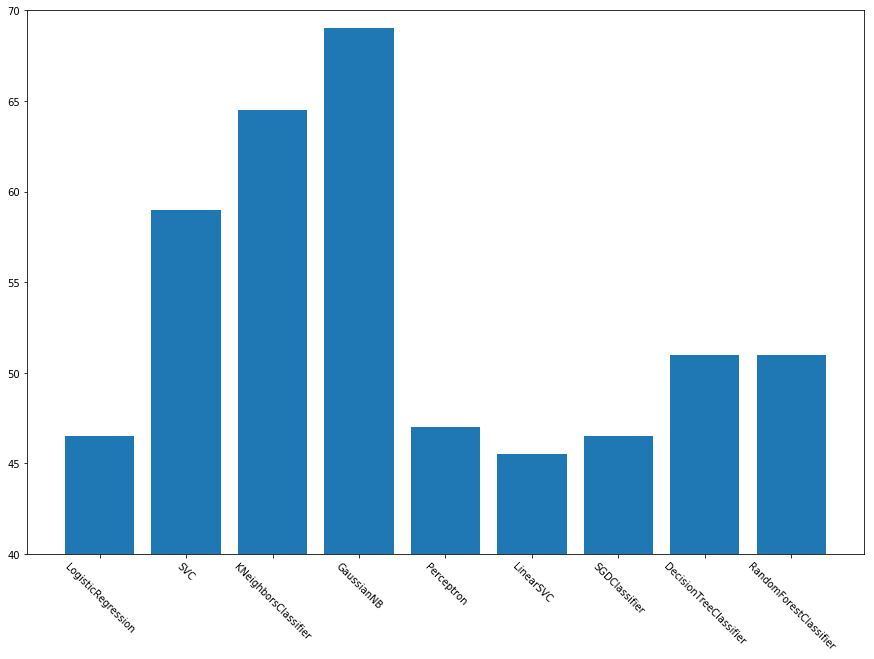

In [50]:
plt.figure(figsize=(15,10))
plt.bar(names, scores)
plt.xticks(rotation=-45)
plt.ylim(40, 70)
plt.show()

In [51]:
pipeline = Pipeline([
    ('normalizer', StandardScaler()), #Step1 - normalize data
    ('clf', LogisticRegression()) #step2 - classifier
])
pipeline.steps

[('normalizer', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('clf',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='warn', n_jobs=None, penalty='l2',
                     random_state=None, solver='warn', tol=0.0001, verbose=0,
                     warm_start=False))]

In [52]:
scores = cross_val_score(pipeline, X_train, Y_train)
scores

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.99837925, 0.99756691, 0.99837794])

In [53]:
names=[]
scores=[]
for classifier in clfs:
    pipeline.set_params(clf = classifier)
    score = cross_val_score(pipeline, X_train, Y_train).mean()
    name = str(classifier).split('(')[0]
    print('---------------------------------')
    print(name, score)
    names.append(name)
    scores.append(score)

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in 

---------------------------------
LogisticRegression 0.9981080348054996
---------------------------------
SVC 0.9975680053700615


/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


---------------------------------
KNeighborsClassifier 0.9983785972204148
---------------------------------
GaussianNB 0.9983783781415364


/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


---------------------------------
Perceptron 0.9972972238762677


/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


---------------------------------
LinearSVC 0.9981082538843781
---------------------------------
SGDClassifier 0.9967569753619512
---------------------------------
DecisionTreeClassifier 0.9962160696109992


/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


---------------------------------
RandomForestClassifier 0.9978379105483413


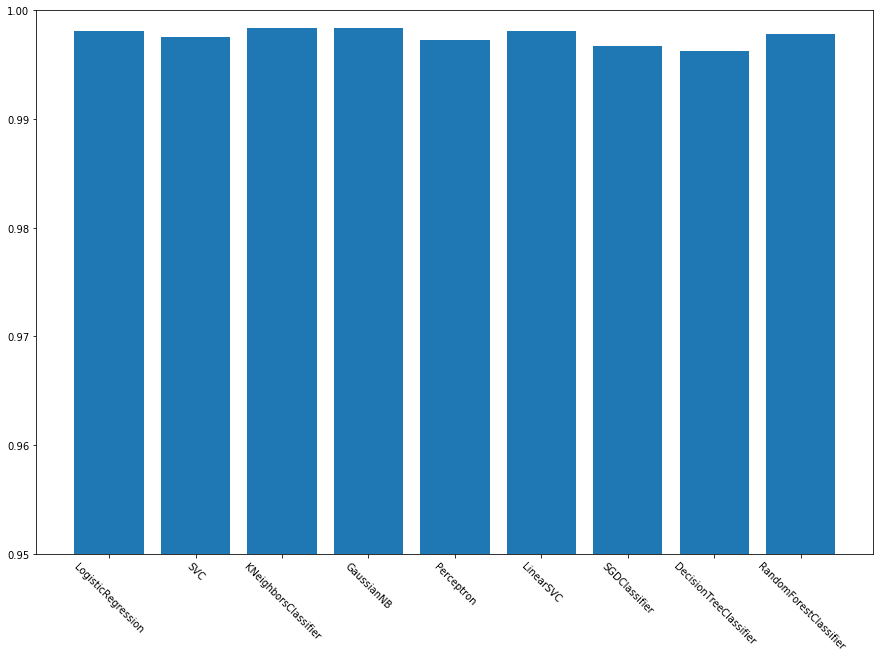

In [54]:
plt.figure(figsize=(15,10))
plt.bar(names, scores)
plt.xticks(rotation=-45)
plt.ylim(0.95, 1.0)
plt.show()